# Esercizi sulle variabili aleatorie discrete

## Librerie

In [1]:
from scipy.stats import expon
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import random

1) Il numero di anni di funzionamento di una radio ha una distribuzione esponenziale di parametro
λ=1/8.
- Qual è la probabilità che una radio funzioni per più di dieci anni?
- Costruire il grafico della
densità e della funzione di ripartizione della distribuzione in esame.

In [2]:
lam = 1/8
t = 10 # tempo di guasto accidentale

p_es1 = expon.sf(t, scale=1/lam) # P(X > t) = 1 - F(t) = S(t)
p_es1

0.2865047968601901

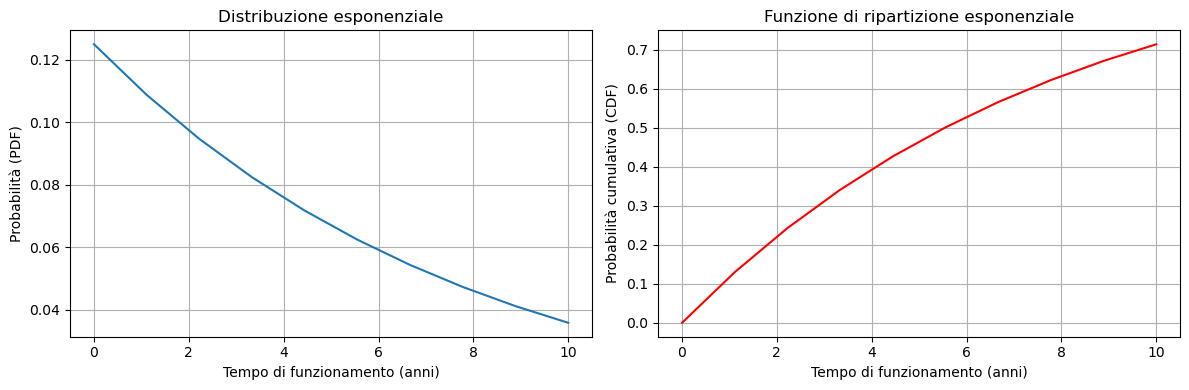

In [3]:
x = np.linspace(0, t, 10)
y_pdf = expon.pdf(x, scale=1/lam)
y_cdf = expon.cdf(x, scale=1/lam)

plt.figure(figsize=(12, 4))

# Grafico della distribuzione esponenziale
plt.subplot(121)
plt.plot(x, y_pdf)
plt.title('Distribuzione esponenziale')
plt.xlabel('Tempo di funzionamento (anni)')
plt.ylabel('Probabilità (PDF)')
plt.grid()

# Grafico della funzione di ripartizione esponenziale
plt.subplot(122)
plt.plot(x, y_cdf, 'r')
plt.title('Funzione di ripartizione esponenziale')
plt.xlabel('Tempo di funzionamento (anni)')
plt.ylabel('Probabilità cumulativa (CDF)')
plt.grid()

plt.tight_layout()
plt.show()

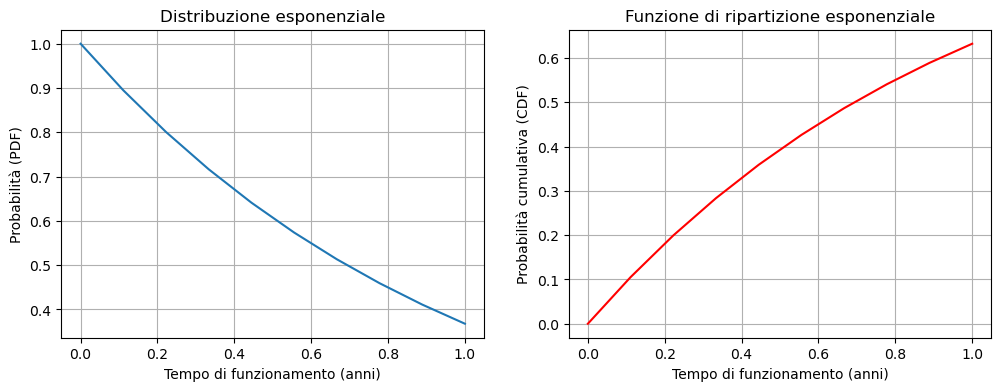

In [25]:
x = np.linspace(0, t, 10)
y_pdf = expon.pdf(x, scale=1/lam)
y_cdf = expon.cdf(x, scale=1/lam)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Grafico della distribuzione esponenziale
ax1.plot(x, y_pdf)
ax1.set_title('Distribuzione esponenziale')
ax1.set_xlabel('Tempo di funzionamento (anni)')
ax1.set_ylabel('Probabilità (PDF)')
ax1.grid()

# Grafico della funzione di ripartizione esponenziale
ax2.plot(x, y_cdf, 'r')
ax2.set_title('Funzione di ripartizione esponenziale')
ax2.set_xlabel('Tempo di funzionamento (anni)')
ax2.set_ylabel('Probabilità cumulativa (CDF)')
ax2.grid()

plt.show()

2) Il tempo (in ore) necessario per riparare un macchinario è una v.a. esponenziale di parametro λ=1.
- Qual è la probabilità che la riparazione superi le due ore di tempo? 
- Qual è la probabilità che la riparazione richieda almeno tre ore, sapendo che ne richiede più di due?

In [4]:
lam = 1
t = 2
p_es2 = expon.sf(t, scale=1/lam)

p_es2

0.13533528323661267

In [5]:
t = 1
p_es2 = expon.sf(t, scale=1/lam) # P(X >= 3 | X > 2) = P(X > 1)

p_es2

0.3678794411714424

3) Si suppone che l’altezza degli uomini in Italia segua approssimativamente una v.a. normale di media
175 cm e deviazione standard 9 cm. 
- Quale sarebbe la percentuale di italiani di statura superiore al metro e 90? 
- Alla visita di leva vengono scartate le reclute di altezza inferiore ai 153 cm. Quale sarebbe la percentuale di reclute scartate alla visita di leva? 
- Costruire il grafico della densità e della funzione di ripartizione della distribuzione in esame.

In [6]:
mu = 175
sig = 9 
x = 190

p_es3 = 1- norm.cdf(x, mu, sig) # 1 - P(X < x)
p_es3

0.047790352272814696

In [7]:
x = 153

p_es3 = norm.cdf(x, mu, sig) # P(X < x)
percentuale = p_es3 * 100
percentuale

0.7253771124867816

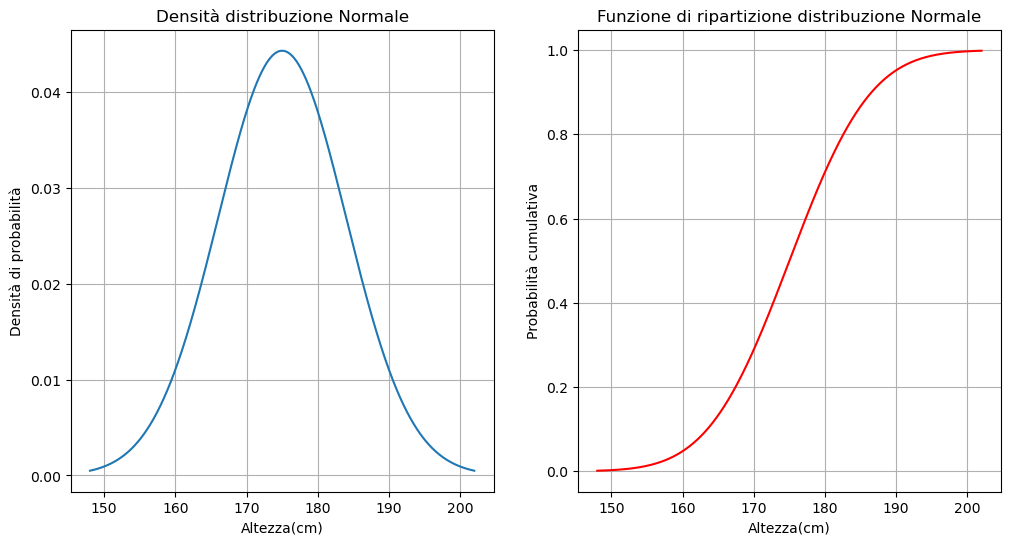

In [8]:
x = np.linspace(mu - 3 * sig, mu + 3 * sig, 1000) # intervallo di copertura della Normale
y_pdf = norm.pdf(x, mu, sig)
y_cdf = norm.cdf(x, mu, sig)

plt.figure(figsize=(12, 6))

# Densità
plt.subplot(121)
plt.plot(x, y_pdf)
plt.title('Densità distribuzione Normale')
plt.xlabel('Altezza(cm)')
plt.ylabel('Densità di probabilità')
plt.grid()

# Densità
plt.subplot(122)
plt.plot(x, y_cdf, 'r')
plt.title('Funzione di ripartizione distribuzione Normale')
plt.xlabel('Altezza(cm)')
plt.ylabel('Probabilità cumulativa')
plt.grid()

plt.show()

4) Si scelga a caso un punto X all’interno dell’intervallo [0,2]. 
- Qual è la probabilità che il triangolo equilatero il cui lato ha lunghezza X abbia area maggiore di 1?

In [9]:
def area_triangolo_equilatero(lato):
    return (lato ** 2) * (3 ** 0.5) / 4

n = 1000000  # Numero di simulazioni da eseguire
k = 0 # Conta le aree maggiori di 1

for _ in range(n):
    x = random.uniform(0, 2)  # Genera un punto casuale in [0, 2]
    area = area_triangolo_equilatero(x)
    if area > 1:
        k += 1

p_es4 = k / n # Calcolo la probabilità come casi favorevoli / casi possibili
p_es4

0.24003

5) Ad un esame universitario, il voto medio è stato 24 e la deviazione standard 4. Supponendo i voti
distribuiti normalmente, calcolare:
- la probabilità che uno studente abbia riportato un voto superiore a 27
- la probabilità che uno studente abbia riportato un voto inferiore a 22
- la probabilità che uno studente abbia riportato un voto compreso tra 23 e 25
- il voto minimo riportato dal 70% degli studenti
- il voto massimo non superato dal 90% degli studenti

In [10]:
mu = 24
sig = 4
x = 27

p_es5 = 1 - norm.cdf(x, mu, sig)
p_es5

0.22662735237686826

In [11]:
x = 22

p_es5 = norm.cdf(x, mu, sig)
p_es5

0.3085375387259869

In [12]:
p_es5 = norm.cdf(25, mu, sig) - norm.cdf(23, mu, sig)
p_es5

0.1974126513658474

In [13]:
min = norm.ppf(1-0.7, mu, sig) # il valore in modo che il 70% dei dati sia inferiore o uguale min
min

21.902397949167838

In [14]:
max = norm.ppf(0.9, mu, sig) # il valore in modo che il 90% dei dati sia inferiore o uguale max
max 

29.1262062621784